In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

%matplotlib inline

In [3]:
fpath = 'facebook_data_CNN_post_sentimen.tsv'
post_data = pd.read_csv(fpath, sep='\t')


C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Posts')

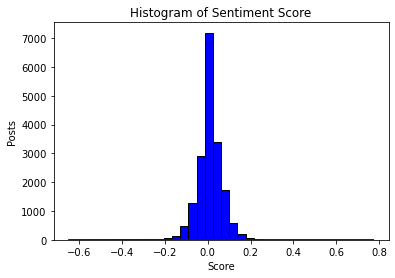

In [24]:
plt.hist(post_data['SentimentScore'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(post_data['SentimentScore'], hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Posts')

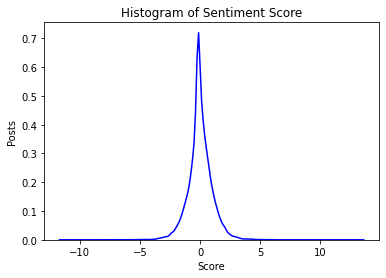

In [25]:


# seaborn histogram
sns.distplot((post_data['SentimentScore'] - post_data['SentimentScore'].mean())/post_data['SentimentScore'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [26]:
post_data['SentimentScore'].describe()

count    18092.000000
mean         0.008855
std          0.056207
min         -0.625000
25%         -0.017241
50%          0.000000
75%          0.037500
max          0.750000
Name: SentimentScore, dtype: float64

In [27]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')

In [28]:
post_data['PostDate'].head()

0   2021-05-16 18:33:17
1   2021-05-16 18:01:11
2   2021-05-16 18:00:31
3   2021-05-16 17:41:09
4   2021-05-16 17:00:52
Name: PostDate, dtype: datetime64[ns]

In [29]:
post_data['DateMonth'].head()

0    2021-05
1    2021-05
2    2021-05
3    2021-05
4    2021-05
Name: DateMonth, dtype: object

In [30]:
Monthly_Data = post_data.groupby('DateMonth').agg({'SentimentScore': 'mean','PostID':'count'})

In [12]:
Monthly_Data.head(20)

,SentimentScore,PostID
DateMonth,,
2011-06,0.026768,18
2011-07,0.009693,18
2011-08,-0.002828,21
2011-09,0.015934,30
2011-10,0.013882,29
2011-11,0.008145,24
2011-12,0.015419,22
2012-01,0.000794,22
2012-02,0.029848,20


## Download S&P from Yahoo

In [31]:
SnP_monthly = web.get_data_yahoo('^GSPC','01/01/2010',interval='m')

In [32]:
SnP_monthly.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-01,1150.449951,1071.589966,1116.560059,1073.869995,90947580000,1073.869995
2010-02-01,1112.420044,1044.500000,1073.890015,1104.489990,84561340000,1104.489990
2010-03-01,1180.689941,1105.359985,1105.359985,1169.430054,103683550000,1169.430054
2010-04-01,1219.800049,1170.689941,1171.229980,1186.689941,116741910000,1186.689941
2010-05-01,1205.130005,1040.780029,1188.579956,1089.410034,127662780000,1089.410034
2010-06-01,1131.229980,1028.329956,1087.300049,1030.709961,110106750000,1030.709961
2010-07-01,1120.949951,1010.909973,1031.099976,1101.599976,94778110000,1101.599976
2010-08-01,1129.239990,1039.699951,1107.530029,1049.329956,85738250000,1049.329956
2010-09-01,1157.160034,1049.719971,1049.719971,1141.199951,79589450000,1141.199951


In [33]:
SnP_monthly.index = SnP_monthly.index + pd.DateOffset(months=1)
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [34]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [35]:
Granger_data = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [36]:
Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScore']+1)/(Granger_data['SentimentScore']+1).shift(1))

In [37]:
Granger_data

,High,Low,Open,Close,Volume,Adj Close,LogReturn,SentimentScore,PostID,SS_LogReturn
2010-08,1120.949951,1010.909973,1031.099976,1101.599976,94778110000,1101.599976,0.066516,0.017401,24,NaN
2010-09,1129.239990,1039.699951,1107.530029,1049.329956,85738250000,1049.329956,-0.048612,0.004972,61,-0.012292
2010-10,1157.160034,1049.719971,1049.719971,1141.199951,79589450000,1141.199951,0.083928,0.008330,72,0.003336
2010-11,1196.140015,1131.869995,1143.489990,1183.260010,89536270000,1183.260010,0.036193,0.027577,66,0.018908
2010-12,1227.079956,1173.000000,1185.709961,1180.550049,87151070000,1180.550049,-0.002293,0.008981,55,-0.018262
...,...,...,...,...,...,...,...,...,...,...
2021-01,3760.199951,3633.399902,3645.870117,3756.070068,96056410000,3756.070068,0.036449,0.055216,5,0.045268
2021-02,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990,-0.011199,0.002961,243,-0.050789
2021-03,3950.429932,3725.620117,3731.169922,3811.149902,98596960000,3811.149902,0.025757,0.005723,596,0.002751
2021-04,3994.409912,3723.340088,3842.510010,3972.889893,120863560000,3972.889893,0.041563,0.003002,525,-0.002709


In [41]:
gc_res = grangercausalitytests(Granger_data[["SS_LogReturn","LogReturn"]].dropna(),3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4381  , p=0.0126  , df_denom=107, df_num=1
ssr based chi2 test:   chi2=6.6186  , p=0.0101  , df=1
likelihood ratio test: chi2=6.4271  , p=0.0112  , df=1
parameter F test:         F=6.4381  , p=0.0126  , df_denom=107, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2846  , p=0.0163  , df_denom=104, df_num=2
ssr based chi2 test:   chi2=8.9812  , p=0.0112  , df=2
likelihood ratio test: chi2=8.6303  , p=0.0134  , df=2
parameter F test:         F=4.2846  , p=0.0163  , df_denom=104, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7992  , p=0.1521  , df_denom=101, df_num=3
ssr based chi2 test:   chi2=5.7718  , p=0.1233  , df=3
likelihood ratio test: chi2=5.6229  , p=0.1315  , df=3
parameter F test:         F=1.7992  , p=0.1521  , df_denom=101, df_num=3


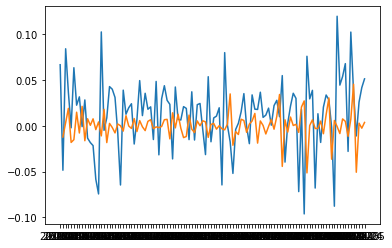

In [40]:
plt.plot(Granger_data["LogReturn"], label = "S&P")
plt.plot(Granger_data["SS_LogReturn"], label = "sentiment")
plt.show()

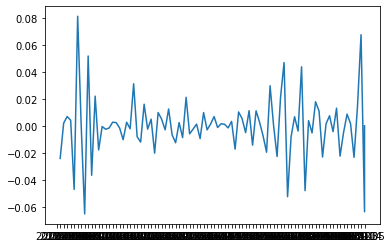

In [95]:
plt.plot(Granger_data["SS_LogReturn"], label = "sentiment")
plt.show()

In [ ]:
df_pi.to_csv('data_simple_index_v2/poisk_krizis_index_month.tsv', sep="\t", index=None)